# Dispersion relations in a micropolar medium

We are interested in computing the dispersion relations in a
homogeneous micropolar solid.

## Wave propagation in micropolar solids

The equations of motion for a micropolar solid are given by [[1, 2]](#References)

\begin{align}
&c_1^2
\nabla\nabla\cdot\mathbf{u}- c_2^2\nabla\times\nabla\times\mathbf{u} + K^2\nabla\times\boldsymbol{\theta} = -\omega^2 \mathbf{u} \, ,\\
&c_3^2 \nabla\nabla\cdot\boldsymbol{\theta} - c_4^2\nabla\times\nabla\times\boldsymbol{\theta} + Q^2\nabla\times\mathbf{u} - 2Q^2\boldsymbol{\theta} = -\omega^2 \boldsymbol{\theta} \, 
\end{align}


where $\mathbf{u}$ is the displacement vector and $\boldsymbol{\theta}$ is the microrrotations vector,
and where: $c_1$ represents the phase/group speed for the longitudinal wave 
($P$) that is non-dispersive as in the classical case, $c_2$ represents the 
high-frequency limit phase/group speed for a transverse wave ($S$) that is dispersive unlike the classical counterpart, $c_3$ represents the high-frequency limit phase/group speed 
for a longitudinal-rotational wave ($LR$) with a corkscrew-like motion that is 
dispersive and does not have a classical counterpart, $c_4$ represents 
the high-frequency limit phase/group speed for a transverse-rotational wave ($TR$) that is dispersive and does not have a classical counterpart, $Q$ represents the cut-off frequency for rotational 
waves appearance, and $K$ quantifies the difference between the low-frequency 
and high-frequency phase/group speed for the S-wave. These parameters are defined by:

\begin{align}
c_1^2 = \frac{\lambda +2\mu}{\rho},\quad &c_3^2 =\frac{\beta + 2\eta}{J},\\
c_2^2 = \frac{\mu +\alpha}{\rho},\quad &c_4^2 =\frac{\eta + \varepsilon}{J},\\
Q^2= \frac{2\alpha}{J},\quad &K^2 =\frac{2\alpha}{\rho} \, ,
\end{align}




## Dispersion relations

To identify types of propagating waves that can arise in the micropolar medium 
it is convenient to expand the displacement and rotation vectors in terms of 
scalar and vector potentials

\begin{align}
\mathbf{u} &= \nabla \phi + \nabla\times\boldsymbol{\Gamma}\, ,\\
\boldsymbol{\theta} &= \nabla \tau + \nabla\times\mathbf{E}\, ,
\end{align}

subject to the conditions:

\begin{align}
&\nabla\cdot\boldsymbol{\Gamma} = 0\\
&\nabla\cdot\mathbf{E} = 0\, .
\end{align}

Using the above in the displacements equations of motion yields the following
equations, after some manipulations

\begin{align}
c_1^2 \nabla^2 \phi &= \frac{\partial^2 \phi}{\partial t^2}\, ,\\
c_3^2 \nabla^2 \tau - 2Q^2\tau &= \frac{\partial^2 \tau}{\partial t^2}\, ,\\
\begin{bmatrix}
c_2^2 \nabla^2 &K^2\nabla\times\, ,\\
Q^2\nabla\times &c_4^2\nabla^2 - 2Q^2
\end{bmatrix}
\begin{Bmatrix} \boldsymbol{\Gamma}\\ \mathbf{E}\end{Bmatrix} &=
\frac{\partial^2}{\partial t^2} \begin{Bmatrix} \boldsymbol{\Gamma}\\ \mathbf{E}\end{Bmatrix} \, ,
\end{align}


where we can see that the equations for the scalar potentials are uncoupled,
while the ones for the vector potentials are coupled.

Writing the vector potentials as plane waves of amplitude $ \mathbf{A}$ and $ 
\mathbf{B}$, wave number $\kappa$ and circular frequency $\omega$ that propagate 
along the \(x\) axis, 

\begin{align}
\boldsymbol{\Gamma} &= \mathbf{A}\exp(i\kappa x - i\omega t)\\
\mathbf{E} &= \mathbf{B}\exp(i\kappa x - i\omega t)\, .
\end{align}

We can do these calculations using some the functions available functions in the package.

In [1]:
from sympy import Matrix, diff, symbols, exp, I, sqrt
from sympy import simplify, expand, solve, limit
from sympy import init_printing, pprint, factor
from continuum_mechanics.vector import lap_vec, curl, div

In [2]:
init_printing()

In [3]:
A1, A2, A3, B1, B2, B3 = symbols("A1 A2 A3 B1 B2 B3")
kappa, omega, t, x = symbols("kappa omega t x")
c1, c2, c3, c4, K, Q = symbols("c1 c2 c3 c4 K Q", positive=True)

We define the vector potentials $\boldsymbol{\Gamma}$ and $\mathbf{E}$.

In [4]:
Gamma = Matrix([A1, A2, A3]) * exp(I*kappa*x - I*omega*t)
E = Matrix([B1, B2, B3]) * exp(I*kappa*x - I*omega*t)

And compute the equations using the vector operators. Namely,
the Laplace ([`vector.lap_vec()`](https://continuum-mechanics.readthedocs.io/en/latest/modules.html#vector.lap_vec)  and the curl
([`vector.curl()`](https://continuum-mechanics.readthedocs.io/en/latest/modules.html#vector.curl))
operators.

In [5]:
eq1 = c2**2 * lap_vec(Gamma) + K**2*curl(E) - Gamma.diff(t, 2)
eq2 = Q**2 * curl(Gamma) + c4**2*lap_vec(E) - 2*Q**2*E - E.diff(t, 2)
eq1 = simplify(eq1/exp(I*kappa*x - I*omega*t))
eq2 = simplify(eq2/exp(I*kappa*x  - I*omega*t))
eq = eq1.col_join(eq2)

We can compute the matrix for the system using [`.jacobian()`](https://docs.sympy.org/1.5.1/modules/matrices/matrices.html#sympy.matrices.matrices.MatrixCalculus.jacobian) 

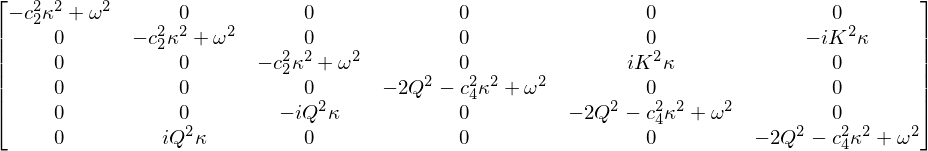

In [6]:
M = eq.jacobian([A1, A2, A3, B1, B2, B3])
M

And, we are interested in the determinant of the matrix $M$.

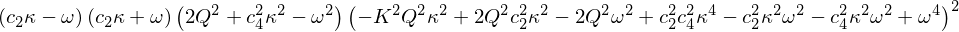

In [7]:
factor(M.det())

The roots for this polynomial (in $\omega^2$) represent the dispersion
relations.

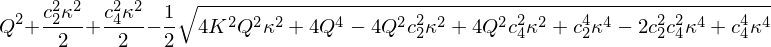

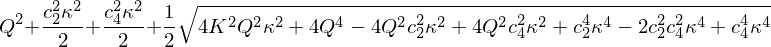

In [8]:
disps = solve(M.det(), omega**2)
for disp in disps:
    display(disp)

## References

1. Nowacki, W. (1986). Theory of asymmetric elasticity. Pergamon Press, Headington Hill Hall, Oxford OX 3 0 BW, UK, 1986.

2. Guarín-Zapata, N., Gomez, J., Valencia, C., Dargush, G. F., & Hadjesfandiari, A. R. (2020). Finite element modeling of micropolar-based phononic crystals. Wave Motion, 92, 102406.